<a href="https://colab.research.google.com/github/abruc13/idk/blob/main/Take-Home%20Lab%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

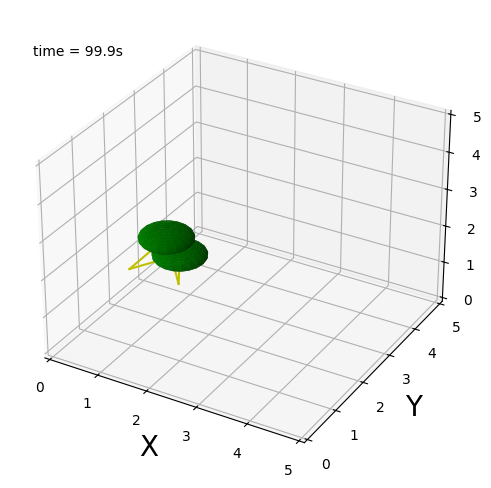

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import mpl_toolkits.mplot3d as plt3d

# Setting up the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_zlim(0,5)

# Setting initial positions and velocities
x1 = 1.0
y1 = 1.0
z1 = 2.0

x2 = 2.0
y2 = 1.0
z2 = 2.0

x3 = 1.5
y3 = 1 + (0.75)**(1/2)
z3 = 2.0

x4 = 1.5
y4 = 1 + ((0.75)**(1/2))/2
z4 = 2.75

vx1 = -1.5
vy1 = 0.0
vz1 = 5.5

vx2 = 0.0
vy2 = 0.0
vz2 = -5.5

vx3 = 0.0
vy3 = 1.0
vz3 = 0.0

vx4 = 3.5
vy4 = 0.0
vz4 = 0.5

# Setting your time values
tStart = 0
tDuration = 100.0
tStop = tStart + tDuration
dt = 0.1
numberOfTimeSteps = int((tStop - tStart)/dt)

# Setting Masses, Spring strengths, natural lengths and air damping
L = 0.2
K = 20
C1 = 0.05
C2 = 0.05
C3 = 0.05
C4 = 0.05
M1 = 10
M2 = 10
M3 = 10
M4 = 10

# Creating spheres
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
radius = 0.5
sphereX = np.cos(u)*np.sin(v)*radius
sphereY = np.sin(u)*np.sin(v)*radius
sphereZ = np.cos(v)*radius*radius
ball1 = ax.plot_surface(sphereX + x1, sphereY + y1, sphereZ + z1, color="r")
ball2 = ax.plot_surface(sphereX + x2, sphereY + y2, sphereZ + z2, color="b")
ball3 = ax.plot_surface(sphereX + x3, sphereY + y3, sphereZ + z3, color="g")
ball4 = ax.plot_surface(sphereX + x4, sphereY + y4, sphereZ + z4, color="o")

# Creating line to connect the spheres
line = plt3d.art3d.Line3D((x1, x2), (y1, y2), (z1, z2), color = 'y')
lineObject = ax.add_line(line)
line2 = plt3d.art3d.Line3D((x2, x3), (y2, y3), (z2, z3), color = 'y')
lineObject2 = ax.add_line(line2)
line3 = plt3d.art3d.Line3D((x3, x1), (y3, y1), (z3, z1), color = 'y')
lineObject3 = ax.add_line(line3)
line4 = plt3d.art3d.Line3D((x1, x4), (y1, y4), (z1, z4), color = 'y')
lineObject4 = ax.add_line(line4)
line5 = plt3d.art3d.Line3D((x2, x4), (y2, y4), (z2, z4), color = 'y')
lineObject5 = ax.add_line(line5)
line6 = plt3d.art3d.Line3D((x3, x4), (y3, y4), (z3, z4), color = 'y')
lineObject6 = ax.add_line(line6)

# Creating the time text to put in the window
time_template = 'time = %.1fs'
time_text = ax.text2D(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    global x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vy4, x4, y4, z4, vx4, vy4, vz4, ball1, ball2, ball3, ball4, lineObject, lineObject2, lineObject3, lineObject4, lineObject5, lineObject6
    ball1.remove()
    ball2.remove()
    ball3.remove()
    ball4.remove()
    lineObject.remove()
    lineObject2.remove()
    lineObject3.remove()
    lineObject4.remove()
    lineObject5.remove()
    lineObject6.remove()

    # Finding the force caused by spring
    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1
    d = math.sqrt(dx*dx + dy*dy + dz*dz)
    f = K*(d - L)
    dx2 = x3 - x2
    dy2 = y3 - y2
    dz2 = z3 - z2
    d2 = math.sqrt(dx2*dx2 + dy2*dy2 + dz2*dz2)
    f2 = K*(d2 - L)
    dx3 = x1 - x3
    dy3 = y1 - y3
    dz3 = z1 - z3
    d3 = math.sqrt(dx3*dx3 + dy3*dy3 + dz3*dz3)
    f3 = K*(d2 - L)
    dx4 = x4 - x1
    dy4 = y4 - y1
    dz4 = z4 - z1
    d4 = math.sqrt(dx4*dx4 + dy4*dy4 + dz4*dz4)
    f4 = K*(d4 - L)
    dx5 = x4 - x2
    dy5 = y4 - y2
    dz5 = z4 - z2
    d5 = math.sqrt(dx5*dx5 + dy5*dy5 + dz5*dz5)
    f5 = K*(d5 - L)
    dx6 = x4 - x3
    dy6 = y4 - y3
    dz6 = z4 - z3
    d6 = math.sqrt(dx6*dx6 + dy6*dy6 + dz6*dz6)
    f6 = K*(d6 - L)

    # Updating the velocities
    if(i == 0):
      vx1 = vx1 + ((f/M1)*(dx/d) + (f3/m1)*(-dx3/d3) + (f4/M1)*(dx4/d4) - C1*vx1)*dt/2.0
      vy1 = vy1 + ((f/M1)*(dy/d) + (f3/m1)*(-dy3/d3) + (f4/M1)*(dy4/d4) - C1*vy1)*dt/2.0
      vz1 = vz1 + ((f/M1)*(dz/d) + (f3/m1)*(-dz3/d3) + (f4/M1)*(dz4/d4) - C1*vz1)*dt/2.0
      vx2 = vx2 + ((f/M2)*(-dx/d) + (f2/M2)*(dx2/d2) + (f5/M2)*(dx5/d5) - C2*vx2)*dt/2.0
      vy2 = vy2 + ((f/M2)*(-dy/d) + (f2/M2)*(dy2/d2) + (f5/M2)*(dy5/d5) - C2*vy2)*dt/2.0
      vz2 = vz2 + ((f/M2)*(-dz/d) + (f2/M2)*(dz2/d2) + (f5/M2)*(dz5/d5) - C2*vz2)*dt/2.0
      vx3 = vx3 + ((f2/M3)*(-dx2/d2) + (f3/M3)*(dx3/d3) + (f6/M3)*(dx6/d6) - C3*vx3)*dt/2.0
      vy3 = vy3 + ((f2/M3)*(-dy2/d2) + (f3/M3)*(dy3/d3) + (f6/M3)*(dy6/d6) - C3*vy3)*dt/2.0
      vz3 = vz3 + ((f2/M3)*(-dz2/d2) + (f3/M3)*(dz3/d3) + (f6/M3)*(dz6/d6) - C3*vz3)*dt/2.0
      vx4 = vx4 + ((f4/M4)*(-dx4/d4) + (f5/M4)*(-dx5/d5) + (f6/M4)*(-dx6/d6) - C1*vx4)*dt/2.0
      vy4 = vy4 + ((f4/M4)*(-dy4/d4) + (f5/M4)*(-dy5/d5) + (f6/M4)*(-dy6/d6) - C1*vy4)*dt/2.0
      vz4 = vz4 + ((f4/M4)*(-dz4/d4) + (f5/M4)*(-dz5/d5) + (f6/M4)*(-dz6/d6) - C1*vz4)*dt/2.0
    else:
      vx1 = vx1 + ((f/M1)*(dx/d) + (f3/m1)*(dx3/d3) + (f4/M1)*(dx4/d4) - C1*vx1)*dt
      vy1 = vy1 + ((f/M1)*(dy/d) + (f3/m1)*(dy3/d3) + (f4/M1)*(dy4/d4) - C1*vy1)*dt
      vz1 = vz1 + ((f/M1)*(dz/d) + (f3/m1)*(dz3/d3) + (f4/M1)*(dz4/d4) - C1*vz1)*dt
      vx2 = vx2 + ((f/M2)*(-dx/d) + (f2/M2)*(dx2/d2) + (f5/M2)*(dx5/d5) - C2*vx2)*dt
      vy2 = vy2 + ((f/M2)*(-dy/d) + (f2/M2)*(dy2/d2) + (f5/M2)*(dy5/d5) - C2*vy2)*dt
      vz2 = vz2 + ((f/M2)*(-dz/d) + (f2/M2)*(dz2/d2) + (f5/M2)*(dz5/d5) - C2*vz2)*dt
      vx3 = vx3 + ((f2/M3)*(-dx2/d2) + (f3/M3)*(dx3/d3) + (f6/M3)*(dx6/d6) - C3*vx3)*dt
      vy3 = vy3 + ((f2/M3)*(-dy2/d2) + (f3/M3)*(dy3/d3) + (f6/M3)*(dy6/d6) - C3*vy3)*dt
      vz3 = vz3 + ((f2/M3)*(-dz2/d2) + (f3/M3)*(dz3/d3) + (f6/M3)*(dz6/d6) - C3*vz3)*dt
      vx4 = vx4 + ((f4/M4)*(-dx4/d4) + (f5/M4)*(-dx5/d5) + (f6/M4)*(-dx6/d6) - C1*vx4)*dt
      vy4 = vy4 + ((f4/M4)*(-dy4/d4) + (f5/M4)*(-dy5/d5) + (f6/M4)*(-dy6/d6) - C1*vy4)*dt
      vz4 = vz4 + ((f4/M4)*(-dz4/d4) + (f5/M4)*(-dz5/d5) + (f6/M4)*(-dz6/d6) - C1*vz4)*dt

    # Updating the positions
    x1 = x1 + vx1*dt
    y1 = y1 + vy1*dt
    z1 = z1 + vz1*dt
    x2 = x2 + vx2*dt
    y2 = y2 + vy2*dt
    z2 = z2 + vz2*dt
    x3 = x3 + vx3*dt
    y3 = y3 + vy3*dt
    z3 = z3 + vz3*dt
    x4 = x4 + vx4*dt
    y4 = y4 + vy4*dt
    z4 = z4 + vz4*dt

    ball1 = ax.plot_surface(sphereX + x1, sphereY + y1, sphereZ + z1, color="r")
    ball2 = ax.plot_surface(sphereX + x2, sphereY + y2, sphereZ + z2, color="b")
    ball3 = ax.plot_surface(sphereX + x3, sphereY + y3, sphereZ + z3, color="g")
    ball4 = ax.plot_surface(sphereX + x4, sphereY + y4, sphereZ + z4, color="o")
    line = plt3d.art3d.Line3D((x1, x2), (y1, y2), (z1, z2), color = 'y')
    lineObject = ax.add_line(line)
    line2 = plt3d.art3d.Line3D((x2, x3), (y2, y3), (z2, z3), color = 'y')
    lineObject2 = ax.add_line(line2)
    line3 = plt3d.art3d.Line3D((x3, x1), (y3, y1), (z3, z1), color = 'y')
    lineObject3 = ax.add_line(line3)
    line4 = plt3d.art3d.Line3D((x1, x4), (y1, y4), (z1, z4), color = 'y')
    lineObject4 = ax.add_line(line4)
    line5 = plt3d.art3d.Line3D((x2, x4), (y2, y4), (z2, z4), color = 'y')
    lineObject5 = ax.add_line(line5)
    line6 = plt3d.art3d.Line3D((x3, x4), (y3, y4), (z3, z4), color = 'y')
    lineObject6 = ax.add_line(line6)
    time_text.set_text(time_template % (i*dt))
    return lineObject, ball1, ball2, time_text, lineObject2, lineObject3, lineObject4, lineObject5, lineObject6, ball3, ball4

anim = animation.FuncAnimation(fig, animate,
                               frames=numberOfTimeSteps,
                               interval=20,
                               blit=True)

HTML(anim.to_html5_video())